# Lab | Web Scraping Single Page

### Instructions - Scraping popular songs

Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

You have find data on the internet about currently popular songs. 

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from random import randint
from time import sleep
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn import cluster, datasets

In [198]:
url = 'https://www.popvortex.com/music/charts/top-100-songs.php'

In [199]:
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [200]:
soup = BeautifulSoup(response.content, "html.parser")

In [201]:
soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p')

[<p class="title-artist"><cite class="title">Unholy</cite><em class="artist">Sam Smith &amp; Kim Petras</em></p>]

In [202]:
top100_songs = []
top100_artist = []
year = []

num_iter = len(soup.select(".title-artist"))
song = soup.select(".title")
artist = soup.select(".artist")

for i in range(num_iter):
    top100_songs.append(song[i].get_text())
    top100_artist.append(artist[i].get_text())
    year.append(2022)

#print(top100_songs)
#print(top100_artist)

In [203]:
top100_songs_df = pd.DataFrame({'title':top100_songs,
                                'artist':top100_songs,
                                'year':year})

In [204]:
top100_songs_df.head()

,title,artist,year
0,Unholy,Unholy,2022
1,I'm Good (Blue),I'm Good (Blue),2022
2,Thank God,Thank God,2022
3,wait in the truck,wait in the truck,2022
4,Face It Alone,Face It Alone,2022


In [269]:
#ask user for a song he/she likes
music = input("\nEnter your music? ") 

#get a random music form the top100
random_music = random.choice(top100_songs) 
    
if music in top100_songs_df['title'].values:
    print('Great choice. Here is another music from the Top 100: ',random_music)
else:
    print('Oh, bad luck! Try again tomorrow or listen to one of the musics from the Top 100: ', random_music)



Enter your music? Thank God
Great choice. Here is another music from the Top 100:  Build a Boat


# Lab | Web Scraping Multiple Pages

#### Expand the project

If you're done, you can try to expand the project on your own. Here are a few suggestions:

 - Find other lists of hot songs on the internet and scrape them too: having a bigger pool of songs will be awesome!

In [270]:
url = "https://playback.fm/charts/top-100-songs/2000"

In [271]:
response = requests.get(url)
response.status_code

200

In [272]:
soup = BeautifulSoup(response.content, "html.parser")

In [273]:
iterations = range(2000, 2022)
for i in iterations:
    print(i)


2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [274]:
pages = []

iterations = range(2000, 2022)
[i for i in iterations]

for i in iterations:
    year= str(i)
    url = "https://playback.fm/charts/top-100-songs/" + year
    
    response = requests.get(url)

    # monitor the process by printing the status code
    #print("Status code: " + str(response.status_code))

    # store response into "pages" list
    pages.append(response)

    # respectful nap:
    wait_time = randint(1,2)
    sleep(wait_time)
    

In [275]:
new_song_list = []
new_artist_list = []
year = []


for i in range(len(pages)):
    # parse all pages
    soup = BeautifulSoup(pages[i].content, "html.parser")
    
    songs_catalogue = soup.select('#myTable')
    
    song = soup.select(".song a")
    artist = soup.select(".artist")
    
    
  
    
    for j in range(len(song)):
        new_song_list.append(song[j].get_text().replace('\n','')) 
        new_artist_list.append(artist[j].get_text().replace('\n',''))
        year.append(i)
            
#print(new_song_list)
#print(new_artist_list)
#print(year)


In [276]:
# Turn new list into a dataframe

top100_new_list_df = pd.DataFrame({'title':new_song_list,
                                  'artist':new_artist_list,
                                  'year':year})
top100_new_list_df.head()

,title,artist,year
0,Music,Madonna,0
1,Beautiful Day,U2,0
2,"Bye, Bye, Bye",N Sync,0
3,Stan,Eminem,0
4,Oops!... I Did it Again,Britney Spears,0


In [277]:
#change formar column year
top100_new_list_df['year']=top100_new_list_df['year'].replace(to_replace = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
                                                              value = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [278]:
full_list_df = pd.concat([top100_songs_df,top100_new_list_df], axis=0)

In [279]:
full_list_df.shape

(2298, 3)

In [280]:
full_list_df = full_list_df.drop_duplicates()

In [281]:
full_list_df.shape

(2296, 3)

In [283]:
full_list_df

,title,artist,year
0,Unholy,Unholy,2022
1,I'm Good (Blue),I'm Good (Blue),2022
2,wait in the truck,wait in the truck,2022
3,Thank God,Thank God,2022
4,Everywhere,Everywhere,2022
...,...,...,...
2193,Leave Before You Love Me,Marshmello & Jonas Brothers,2021
2194,Beggin,Maneskin,2021
2195,Famous Friends,Chris Young + Kane Brown,2021
2196,Lil Bit,Nelly & Florida Georgia Line,2021


 - Apply the same logic to other "groups" of songs: the best songs from a decade or from a country / culture / language / genre.

In [286]:
def get_page(url):
    return requests.get(url, timeout =1.).text

In [293]:
# For more details about usinf Beautiful Soup
#     https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

def scraping_music(url,df):
    
    #df = pd.DataFrame()
    
    #Request the content (source code) of a specific URL from the server
    response = requests.get(url) 
    print(response.status_code)
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    
    #print out the HTML content of the page, formatted nicely, using the prettify
    #print(soup.prettify())
    
    
    
    # Identify the elements of the page that are part of the table we want to extract
    songs = []
    artists = []
    year = []

    # nr of times an element appears
    num_iter = len(soup.select(".title-artist")) #change according to the website
    
    # get titles
    song = soup.select(".title") ##change according to the website
    
    # get artist
    artist = soup.select(".artist") ##change according to the website
    
    
    
    # Extract those elements into a dataset
    for i in range(num_iter):
        songs.append(song[i].get_text())
        artists.append(artist[i].get_text())
        year.append(2022)
    
    df = pd.DataFrame({'title':songs,'artist':artist,'year':year})
    
    
    return df

In [294]:
scraping_music('https://www.popvortex.com/music/charts/top-100-songs.php','top100')

200


,title,artist,year
0,Unholy,[Sam Smith & Kim Petras],2022
1,I'm Good (Blue),[David Guetta & Bebe Rexha],2022
2,wait in the truck,[HARDY & Lainey Wilson],2022
3,A Thousand Years,[Christina Perri],2022
4,Son Of A Sinner,[Jelly Roll],2022
...,...,...,...
95,Sand In My Boots,[Morgan Wallen],2022
96,Betty (Get Money),[Yung Gravy],2022
97,Half Of Me (feat. Riley Green),[Thomas Rhett],2022
98,Boom Clap,[Charli XCX],2022


In [400]:
def billboard(url):
    
    #df = pd.DataFrame()
    
    #Request the content (source code) of a specific URL from the server
    response = requests.get(url) 
    print(response.status_code)
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    
    #print out the HTML content of the page, formatted nicely, using the prettify
    #print(soup.prettify())
    
    
    
    # Identify the elements of the page that are part of the table we want to extract
    songs = []
    artists = []
    year = []

    # nr of times an element appears
    num_iter = len(soup.select("#title-of-a-story")) #change according to the website
    
    # get titles
    song = soup.select(".c-title") ##change according to the website
    
    # get artist
    artist = soup.select(".c-label") ##change according to the website
    
    
    
    # Extract those elements into a dataset
    for i in range(num_iter):
        songs.append(song[i].get_text().replace('\n','').replace('\t',''))
        artists.append(artist[i].get_text().replace('\n','').replace('\t',''))
        #year.append(2022)
    
    df = pd.DataFrame({'title':songs,'artist':artists})
    
    
    return df

In [403]:
billboard_df = billboard('https://www.billboard.com/charts/billboard-200/')
billboard_df

200


,title,artist
0,Un Verano Sin Ti,1
1,Imprint/Promotion Label:,13
2,Bad Bunny Replaces Himself at No. 1 on Hot Lat...,22
3,Gains in Weekly Performance,1
4,Additional Awards,Bad Bunny
...,...,...
411,Printemps Opens Podcast Studio in Paris Flagship,50
412,"NCAA Athletes Can Finally Make Money, but They...",DJ Khaled
413,Follow Us,24
414,Have a Tip?,1


# Lab | API wrappers - Create your collection of songs & audio features

To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd


In [3]:
secrets_file = open("secrets_spotify.txt","r")
string = secrets_file.read()

In [4]:
secrets_dict={} # create a dictionary

for line in string.split('\n'):
    if len(line) > 0: #this is used in case we have empty lines
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [5]:

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [154]:
# Function to get playlist songs and audio features 

def playlist_songs(playlist_id):
    
    df = pd.DataFrame()
    df_audio = pd.DataFrame()
    
    music_list = []
    artist_list = []
    album_list = []
    audio_features_list = []
    
    
    results = sp.user_playlist_tracks("spotify",playlist_id)
    playlist = results['items']
    
    # Get all items
    while results['next']!=None:
        results = sp.next(results)
        playlist = playlist + results['items']
        sleep(randint(1,3))
     
    
    # Extract song name, artist and album name
    for track in playlist:
        music_list.append(track['track']['name']) #list all songs
        artist_list.append(track['track']['artists'][0]['name']) #list all artists. QUESTION = how to get multiple artists???
        album_list.append(track['track']['album']['name']) #list the name of the album
        
        audio_features_list.append(sp.audio_features(track['track']['uri'])) #audio features
        sleep(randint(1,3))
    
    

    
    
    #create df columns
    df['music'] = music_list
    df['artist'] = artist_list
    df['album'] = album_list
    
    #create df for audio features
    df_audio['audio_features'] = audio_features_list
    
    
    # flatten audio features column
    flat_list = ['audio_features']
    flat_list0 = ['audio_features_0']

    #flatten to first remove list
    for column in flat_list:
        flattened = pd.DataFrame(dict(df_audio[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        df_audio = pd.concat([df_audio, flattened], axis=1)
        df_audio = df_audio.drop(column, axis=1)
    
    
    #flatten - then remove dict
    for column in flat_list0:
        flattened = pd.DataFrame(dict(df_audio[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        df_audio = pd.concat([df_audio, flattened], axis=1)
        df_audio = df_audio.drop(column, axis=1)
    
    
    #create a single dataframe with songs and audio features 
    playlist_db = pd.concat([df,df_audio], axis = 1).reset_index()
    
    
    
    return playlist_db
    


In [155]:
#6FTVlz76p3Bmmw4vwKJgHy
playlist_db_hippie_fish = playlist_songs('6FTVlz76p3Bmmw4vwKJgHy')

In [156]:
playlist_db_hippie_fish.shape

(99, 22)

In [157]:
#37i9dQZF1EIfjV34mXjFem
playlist_db_indie_folk = playlist_songs('37i9dQZF1EIfjV34mXjFem')

In [158]:
playlist_db_indie_folk.shape

(50, 22)

In [159]:
#37i9dQZF1DXdVyc8LtLi96
playlist_db_sunrise_yoga = playlist_songs('37i9dQZF1DXdVyc8LtLi96')

In [160]:
playlist_db_sunrise_yoga.shape

(298, 22)

In [162]:
#10f57QMSHHWcnoRTHuQSRV
playlist_db_oxigenio_radio = playlist_songs('10f57QMSHHWcnoRTHuQSRV')

In [163]:
playlist_db_oxigenio_radio.shape

(592, 22)

In [181]:
#37i9dQZF1DXb1cKZ3eM1zf
playlist_db_pinkpop = playlist_songs('37i9dQZF1DXb1cKZ3eM1zf')

In [182]:
playlist_db_pinkpop.shape

(500, 22)

In [183]:
#3x6xRt9FnSbfPbgiO6incZ
playlist_db_french_cafe_house = playlist_songs('3x6xRt9FnSbfPbgiO6incZ')

In [185]:
playlist_db_french_cafe_house.shape

(104, 22)

In [186]:
# create a single list with all playlists

pdList = [playlist_db_hippie_fish, playlist_db_indie_folk, playlist_db_sunrise_yoga, playlist_db_oxigenio_radio,
         playlist_db_pinkpop,playlist_db_french_cafe_house]  # List of your dataframes
playlist_db_all = pd.concat(pdList, axis=0)
playlist_db_all = playlist_db_all.drop(['index'], axis = 1)
playlist_db_all.shape

(1643, 21)

In [195]:
playlist_db_all.to_excel('playlist_db_all.xlsx', sheet_name='spotify_list')  

# Clustering

In [187]:
playlist_db_all.head(5)

,music,artist,album,audio_features_0_danceability,audio_features_0_energy,audio_features_0_key,audio_features_0_loudness,audio_features_0_mode,audio_features_0_speechiness,audio_features_0_acousticness,...,audio_features_0_liveness,audio_features_0_valence,audio_features_0_tempo,audio_features_0_type,audio_features_0_id,audio_features_0_uri,audio_features_0_track_href,audio_features_0_analysis_url,audio_features_0_duration_ms,audio_features_0_time_signature
0,Miniyamba,Yeahman,Shika Shika / Botanas Series,0.702,0.508,4,-9.474,0,0.0457,0.545,...,0.915,0.659,89.004,audio_features,5LLfL25W8ELqVXOLBhkJOP,spotify:track:5LLfL25W8ELqVXOLBhkJOP,https://api.spotify.com/v1/tracks/5LLfL25W8ELq...,https://api.spotify.com/v1/audio-analysis/5LLf...,250787,4
1,We,Marava,We EP,0.867,0.4,2,-10.431,0,0.0542,0.11,...,0.115,0.219,117.972,audio_features,0tujxzW3mEM6CnS0PK0Fcb,spotify:track:0tujxzW3mEM6CnS0PK0Fcb,https://api.spotify.com/v1/tracks/0tujxzW3mEM6...,https://api.spotify.com/v1/audio-analysis/0tuj...,215593,4
2,Quién Me Escucha,Sandra Bernardo,Quién Me Escucha,0.746,0.53,11,-10.645,0,0.272,0.249,...,0.0773,0.574,182.02,audio_features,19e0zVRwZdpid0bGdYXxGi,spotify:track:19e0zVRwZdpid0bGdYXxGi,https://api.spotify.com/v1/tracks/19e0zVRwZdpi...,https://api.spotify.com/v1/audio-analysis/19e0...,198150,4
3,Kompaz,Rodrigo Gallardo,Harabe Daydreams I,0.788,0.493,11,-13.009,0,0.0741,0.0545,...,0.0979,0.244,108.036,audio_features,0E5zTpx6xHATfDox2qMNHY,spotify:track:0E5zTpx6xHATfDox2qMNHY,https://api.spotify.com/v1/tracks/0E5zTpx6xHAT...,https://api.spotify.com/v1/audio-analysis/0E5z...,395556,4
4,"Monday (feat. LEJ, Akhenaton & Blundetto)",Biga*Ranx,1988,0.945,0.46,11,-6.892,0,0.0573,0.157,...,0.0858,0.736,130.065,audio_features,5IZBQqDymS1bDGmesVFC8N,spotify:track:5IZBQqDymS1bDGmesVFC8N,https://api.spotify.com/v1/tracks/5IZBQqDymS1b...,https://api.spotify.com/v1/audio-analysis/5IZB...,177813,4


In [110]:
# for col in playlist_db_all.columns:
#     #print(customer_df[col].unique)
#     print('Name: {}'.format(playlist_db_all[col].name))    # column name
#     print('Type: {}'.format(playlist_db_all[col].dtype))   # column type
#     print('Nr. Unique values: {}'.format(len(playlist_db_all[col].unique())))   # column unique values
#     print('% Unique values: {}'.format(round(len(playlist_db_all[col].unique())/len(playlist_db_all)*100,1)))  # percentage
#     print('Unique values: {}'.format(playlist_db_all[col].unique()))   # column unique values
#     print('\n----------')

In [188]:
#select the features to cluster
playlist_db_all_audio_features = playlist_db_all[['audio_features_0_danceability','audio_features_0_energy',
                                                 'audio_features_0_key','audio_features_0_loudness',
                                                  'audio_features_0_mode', 'audio_features_0_speechiness',
                                                 'audio_features_0_acousticness', 'audio_features_0_instrumentalness',
                                                 'audio_features_0_liveness', 'audio_features_0_valence',
                                                 'audio_features_0_tempo', 'audio_features_0_duration_ms',
                                                 'audio_features_0_time_signature']].apply(pd.to_numeric)

In [189]:
playlist_db_all_audio_features.describe().T

,count,mean,std,min,25%,50%,75%,max
audio_features_0_danceability,1643.0,0.563769,0.241634,0.000,0.415000,0.6210,0.76100,0.985
audio_features_0_energy,1643.0,0.523580,0.299241,0.000,0.318000,0.5830,0.76500,0.995
audio_features_0_key,1643.0,5.235545,3.627934,0.000,2.000000,5.0000,9.00000,11.000
audio_features_0_loudness,1643.0,-12.837372,9.747285,-41.748,-13.383000,-9.1530,-6.55150,1.342
audio_features_0_mode,1643.0,0.608643,0.488203,0.000,0.000000,1.0000,1.00000,1.000
audio_features_0_speechiness,1643.0,0.064225,0.055293,0.000,0.037450,0.0459,0.06415,0.499
audio_features_0_acousticness,1643.0,0.347478,0.379997,0.000,0.015250,0.1410,0.77400,0.996
audio_features_0_instrumentalness,1643.0,0.353166,0.389710,0.000,0.000211,0.0894,0.80300,0.992
audio_features_0_liveness,1643.0,0.154587,0.132926,0.000,0.088350,0.1100,0.15900,0.984
audio_features_0_valence,1643.0,0.434887,0.273121,0.000,0.184500,0.4340,0.65550,0.979


In [190]:
#Scale audio features with MinMaxScaler

#Choose to use this method as there is no reason to emphasize certain features over the others

MinMaxtransformer = MinMaxScaler().fit(playlist_db_all_audio_features)
X_prep = MinMaxtransformer.transform(playlist_db_all_audio_features)
X_prep = pd.DataFrame(X_prep,columns=playlist_db_all_audio_features.columns)
X_prep

,audio_features_0_danceability,audio_features_0_energy,audio_features_0_key,audio_features_0_loudness,audio_features_0_mode,audio_features_0_speechiness,audio_features_0_acousticness,audio_features_0_instrumentalness,audio_features_0_liveness,audio_features_0_valence,audio_features_0_tempo,audio_features_0_duration_ms,audio_features_0_time_signature
0,0.712690,0.510553,0.363636,0.748990,0.0,0.091583,0.547189,0.962702,0.929878,0.673136,0.437115,0.378175,0.8
1,0.880203,0.402010,0.181818,0.726781,0.0,0.108617,0.110442,0.924395,0.116870,0.223698,0.579382,0.324450,0.8
2,0.757360,0.532663,1.000000,0.721815,0.0,0.545090,0.250000,0.214718,0.078557,0.586313,0.893933,0.297822,0.8
3,0.800000,0.495477,1.000000,0.666953,0.0,0.148497,0.054719,0.916331,0.099492,0.249234,0.530584,0.599174,0.8
4,0.959391,0.462312,1.000000,0.808912,0.0,0.114830,0.157631,0.000000,0.087195,0.751788,0.638773,0.266776,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.542132,0.089347,0.818182,0.572569,1.0,0.178758,0.971888,0.047480,0.111789,0.189990,0.850641,0.244942,0.8
1639,0.664975,0.451256,0.818182,0.761267,0.0,0.050301,0.679719,0.000004,0.298780,0.599591,0.442384,0.293258,0.8
1640,0.728934,0.256281,0.545455,0.646461,0.0,0.090381,0.878514,0.000030,0.106707,0.278856,0.608844,0.335478,0.8
1641,0.625381,0.196985,0.000000,0.684196,1.0,0.110822,0.854418,0.000000,0.160569,0.309499,0.598044,0.318110,0.8


In [173]:
#Sclale audio features
# X_prep = StandardScaler().fit_transform(playlist_db_all_audio_features)
# X_prep_df = pd.DataFrame(X_prep,columns=playlist_db_all_audio_features.columns).head()
# X_prep_df

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

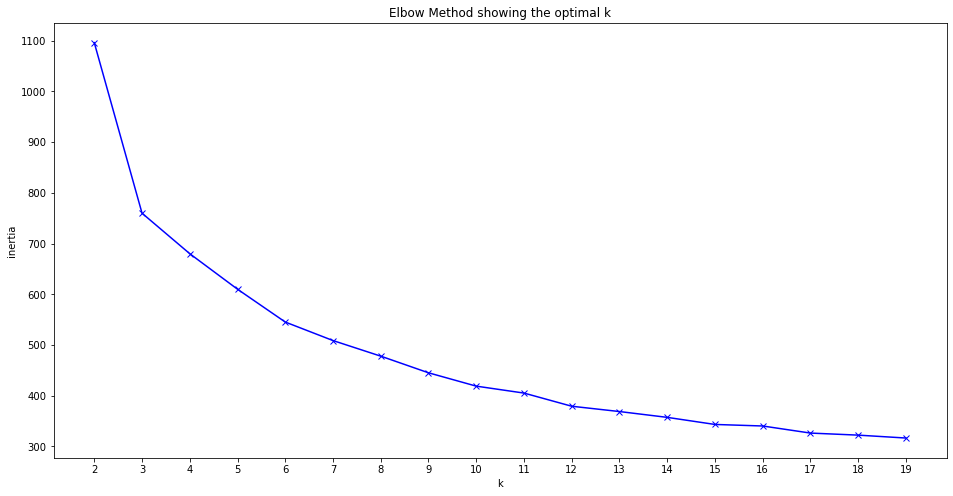

In [191]:
#Selecting the best k

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    clusters = kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [192]:
# predicting clusters

k = 3

kmeans = cluster.KMeans(n_clusters=k)
clusters = kmeans.fit(X_prep)
cluster_pred = kmeans.predict(X_prep)


#Inertia
kmeans.inertia_ 

759.9861004209858

#### Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

In [193]:
# Add cluster number to playlist

playlist_db_all['cluster_pred'] = cluster_pred

In [194]:
playlist_db_all

,music,artist,album,audio_features_0_danceability,audio_features_0_energy,audio_features_0_key,audio_features_0_loudness,audio_features_0_mode,audio_features_0_speechiness,audio_features_0_acousticness,...,audio_features_0_valence,audio_features_0_tempo,audio_features_0_type,audio_features_0_id,audio_features_0_uri,audio_features_0_track_href,audio_features_0_analysis_url,audio_features_0_duration_ms,audio_features_0_time_signature,cluster_pred
0,Miniyamba,Yeahman,Shika Shika / Botanas Series,0.702,0.508,4,-9.474,0,0.0457,0.545,...,0.659,89.004,audio_features,5LLfL25W8ELqVXOLBhkJOP,spotify:track:5LLfL25W8ELqVXOLBhkJOP,https://api.spotify.com/v1/tracks/5LLfL25W8ELq...,https://api.spotify.com/v1/audio-analysis/5LLf...,250787,4,2
1,We,Marava,We EP,0.867,0.4,2,-10.431,0,0.0542,0.11,...,0.219,117.972,audio_features,0tujxzW3mEM6CnS0PK0Fcb,spotify:track:0tujxzW3mEM6CnS0PK0Fcb,https://api.spotify.com/v1/tracks/0tujxzW3mEM6...,https://api.spotify.com/v1/audio-analysis/0tuj...,215593,4,2
2,Quién Me Escucha,Sandra Bernardo,Quién Me Escucha,0.746,0.53,11,-10.645,0,0.272,0.249,...,0.574,182.02,audio_features,19e0zVRwZdpid0bGdYXxGi,spotify:track:19e0zVRwZdpid0bGdYXxGi,https://api.spotify.com/v1/tracks/19e0zVRwZdpi...,https://api.spotify.com/v1/audio-analysis/19e0...,198150,4,2
3,Kompaz,Rodrigo Gallardo,Harabe Daydreams I,0.788,0.493,11,-13.009,0,0.0741,0.0545,...,0.244,108.036,audio_features,0E5zTpx6xHATfDox2qMNHY,spotify:track:0E5zTpx6xHATfDox2qMNHY,https://api.spotify.com/v1/tracks/0E5zTpx6xHAT...,https://api.spotify.com/v1/audio-analysis/0E5z...,395556,4,2
4,"Monday (feat. LEJ, Akhenaton & Blundetto)",Biga*Ranx,1988,0.945,0.46,11,-6.892,0,0.0573,0.157,...,0.736,130.065,audio_features,5IZBQqDymS1bDGmesVFC8N,spotify:track:5IZBQqDymS1bDGmesVFC8N,https://api.spotify.com/v1/tracks/5IZBQqDymS1b...,https://api.spotify.com/v1/audio-analysis/5IZB...,177813,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Que reste-t-il de nos amours ? - Bonus track,Stacey Kent,Raconte-moi... (Bonus Edition),0.534,0.0889,9,-17.076,1,0.0892,0.968,...,0.186,173.205,audio_features,7vY7W8DL8JSaS6aBDFHGW3,spotify:track:7vY7W8DL8JSaS6aBDFHGW3,https://api.spotify.com/v1/tracks/7vY7W8DL8JSa...,https://api.spotify.com/v1/audio-analysis/7vY7...,163510,4,1
100,Barry White,Fredda,Toutes mes aventures,0.655,0.449,9,-8.945,0,0.0251,0.677,...,0.587,90.077,audio_features,3AOHmD0knWrkPCuu4l1Hbb,spotify:track:3AOHmD0knWrkPCuu4l1Hbb,https://api.spotify.com/v1/tracks/3AOHmD0knWrk...,https://api.spotify.com/v1/audio-analysis/3AOH...,195160,4,2
101,Raconte-moi...,Stacey Kent,Raconte-moi... (Bonus Edition),0.718,0.255,6,-13.892,0,0.0451,0.875,...,0.273,123.971,audio_features,2lvlrhaZrPws3DSoZ14hcL,spotify:track:2lvlrhaZrPws3DSoZ14hcL,https://api.spotify.com/v1/tracks/2lvlrhaZrPws...,https://api.spotify.com/v1/audio-analysis/2lvl...,222817,4,2
102,Que reste t-il de nos amours,Cyntia M.,Bistro Blue,0.616,0.196,0,-12.266,1,0.0553,0.851,...,0.303,121.772,audio_features,3rUVcKmdmAjJEt0Zx7nSL5,spotify:track:3rUVcKmdmAjJEt0Zx7nSL5,https://api.spotify.com/v1/tracks/3rUVcKmdmAjJ...,https://api.spotify.com/v1/audio-analysis/3rUV...,211440,4,0


In [121]:
# k = 3
# init_list = ["k-means++", "random"]
# inertia_list = []
# for init in init_list:
#     kmeans_model = KMeans(n_clusters=k, init=init)
#     kmeans_model.fit(X_prep)
#     inertia_list.append(kmeans_model.inertia_)

# results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
# results

,Inertia Value
k-means++,1755.198020
random,1761.453544


# Music recommender

In [ ]:
#import playlists
top100_songs = pd.read_excel('')
playlist_db_all = pd.read_excel('playlist_db_all.xlsx')



In [ ]:
df_audio = pd.DataFrame()
audio_features_list = []

#ask user for a song he/she likes
music = input("\nEnter your music? ") 

#get a random music form the top100
random_music = random.choice(top100_songs) 
    
if music in top100_songs_df['title'].values:
    print('Great choice. Here is another music from the Top 100: ',random_music)
else:
    music_search = sp.search(q=music, limit=1)
    audio_features_list.append(sp.audio_features(music_search['tracks']['items'][0]['uri'])) #audio features
    
    #create df for audio features
    df_audio['audio_features'] = audio_features_list
    
    # flatten audio features column
    flat_list = ['audio_features']
    flat_list0 = ['audio_features_0']

    #flatten to first remove list
    for column in flat_list:
        flattened = pd.DataFrame(dict(df_audio[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        df_audio = pd.concat([df_audio, flattened], axis=1)
        df_audio = df_audio.drop(column, axis=1)


    #flatten - then remove dict
    for column in flat_list0:
        flattened = pd.DataFrame(dict(df_audio[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        df_audio = pd.concat([df_audio, flattened], axis=1)
        df_audio = df_audio.drop(column, axis=1)
    

    df_audio_features = df_audio[['audio_features_0_danceability','audio_features_0_energy',
                                                 'audio_features_0_key','audio_features_0_loudness',
                                                  'audio_features_0_mode', 'audio_features_0_speechiness',
                                                 'audio_features_0_acousticness', 'audio_features_0_instrumentalness',
                                                 'audio_features_0_liveness', 'audio_features_0_valence',
                                                 'audio_features_0_tempo', 'audio_features_0_duration_ms',
                                                 'audio_features_0_time_signature']].apply(pd.to_numeric)

    X_prep = MinMaxtransformer.transform(df_audio_features)
    X_prep = pd.DataFrame(X_prep,columns=df_audio_features.columns)

    cluster_pred = kmeans.predict(X_prep)

    df_audio['cluster_pred'] = cluster_pred

    music_cluster_df = playlist_db_all[playlist_db_all['cluster_pred'].values == df_audio['cluster_pred'].values]

    random_music_spotify = random.choice(music_cluster_df)
 
    
    print('This music in not on Top100! Here is another music you might like: ', random_music_spotify)
